In [43]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.formula.api as smf

In [44]:
df=pd.read_csv("diamonds.csv")

In [45]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [46]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [47]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [49]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [50]:
df.shape

(53940, 11)

In [51]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [52]:
pd.pivot_table(df,values=['carat'],index=['cut'])

,carat
cut,
Fair,1.046137
Good,0.849185
Ideal,0.702837
Premium,0.891955
Very Good,0.806381


In [53]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [70]:
df3=df.copy()

In [71]:
#rename the columns: x, y, and z
df3=df3.rename(columns= {'x':'length_mm', 'y':'width_mm', 'z':'depth_mm'})

In [72]:
df3.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [57]:
pd.get_dummies(data=df2,columns=['cut'])

,Unnamed: 0,carat,color,clarity,depth_mm,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,1,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,2,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,3,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,4,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,5,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0
5,6,0.24,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,0,0,0,1
6,7,0.24,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,0,0,0,0,1
7,8,0.26,H,SI1,61.9,55.0,337,4.07,4.11,2.53,0,0,0,0,1
8,9,0.22,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1,0,0,0,0
9,10,0.23,H,VS1,59.4,61.0,338,4.00,4.05,2.39,0,0,0,0,1


In [73]:
df3.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [74]:
df3['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [87]:
df3.loc[df3['cut']=='Ideal', 'cut']=1
df3.loc[df3['cut']=='Premium', 'cut']=2
df3.loc[df3['cut']=='Very Good', 'cut']=3
df3.loc[df3['cut']=='Good', 'cut']=4
df3.loc[df3['cut']=='Fair', 'cut']=5

df3.head(15)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,1,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,3,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,3,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,3,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,1,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,3,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [88]:
df3['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [89]:
df3['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [90]:
df3.loc[df3['color']=='D', 'color']=1
df3.loc[df3['color']=='E', 'color']=2
df3.loc[df3['color']=='F', 'color']=3
df3.loc[df3['color']=='G', 'color']=4
df3.loc[df3['color']=='H', 'color']=5
df3.loc[df3['color']=='I', 'color']=6
df3.loc[df3['color']=='J', 'color']=7

df3.loc[df3['clarity']=='FL', 'clarity']=1
df3.loc[df3['clarity']=='IF', 'clarity']=2
df3.loc[df3['clarity']=='VVS1', 'clarity']=3
df3.loc[df3['clarity']=='VVS2', 'clarity']=4
df3.loc[df3['clarity']=='VS1', 'clarity']=5
df3.loc[df3['clarity']=='VS2', 'clarity']=6
df3.loc[df3['clarity']=='SI1', 'clarity']=7   
df3.loc[df3['clarity']=='SI2', 'clarity']=8
df3.loc[df3['clarity']=='I1', 'clarity']=9   
df3.loc[df3['clarity']=='I2', 'clarity']=10   
df3.loc[df3['clarity']=='I3', 'clarity']=11

df3.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,1,0.23,5,2,8,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,2,7,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,6,6,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,7,8,63.3,58.0,335,4.34,4.35,2.75


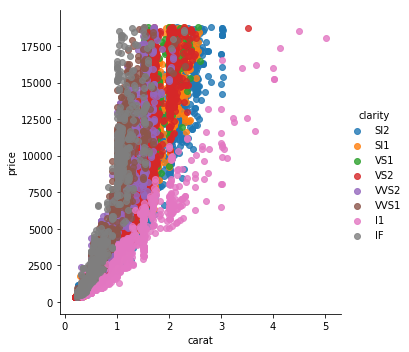

In [76]:
#scatterplot: carat vs price

sns.lmplot(x='carat', y='price', data=df3, fit_reg=False, hue='clarity')

In [91]:
df3.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'length_mm', 'width_mm', 'depth_mm'],
      dtype='object')

In [92]:
df3_sel=df3[['carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'length_mm', 'width_mm', 'depth_mm']]
df3_sel.head()

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,5,2,8,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,7,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,6,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,8,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 1.0, 'Frequency of clarity ')

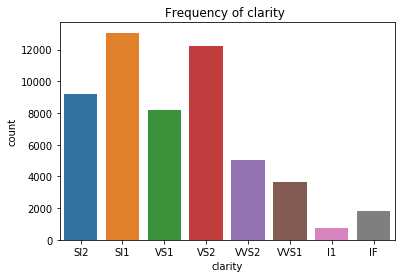

In [95]:
# COUNT PLOT

sns.countplot(x='clarity',
              data=df)

plt.title('Frequency of clarity ') 

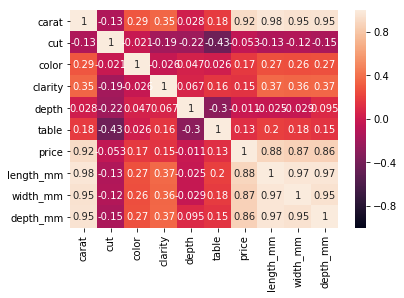

In [93]:
#show correlation of stats via heatmap
corr = df3_sel.corr()
sns.heatmap(corr, vmin=-1, annot=True)

In [96]:
#remove age from regression, since it was not very correlated to other features

result = smf.ols('price ~ carat + length_mm + width_mm + depth_mm', data=df3).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 7.892e+04
Date:                Fri, 01 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:55:08   Log-Likelihood:            -4.7187e+05
No. Observations:               53940   AIC:                         9.437e+05
Df Residuals:                   53935   BIC:                         9.438e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1921.1740    104.373     18.407      0.000    1716.601    2125.747
carat       1.023e+04     62.937    162.607      0.000    1.01e+04    1.04e+04
length_mm   -884.2091     40.470    -21.848      0.000    -963.532    -804.887
width_mm     166.0384     25.858      6.421      0.000     115.356     216.721
depth_mm    -576.2035     39.282    -14.668      0.000    -653.197    -499.210
==============================================================================
Omnibus:                    14400.324   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336485.128
Skew:                           0.743   Prob(JB):                         0.00
Kurtosis:                      15.145   Cond. No.                         171.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""